# 1. Data Loading
*   Import necessary libraries
*   Load dataset
*   View & understand dataset






In [ ]:
#Linear algebra
import numpy as np
#EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#NLTK libraries
import nltk
nltk.download('all')
#Stopwords
from nltk.corpus import stopwords
#Stemmer & Lemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
#Wordcloud
from wordcloud import WordCloud,STOPWORDS
#Tokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
#RE
import re,string,unicodedata
#Bag of words
from textblob import TextBlob
from textblob import Word
#Feature Extraction
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
#Libraries used for handling missing and non-numeric values - part of data cleaning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#ML models
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
#Web Scrapping tool
from bs4 import BeautifulSoup
#ML models
from sklearn.linear_model import LinearRegression, LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
#R2 square and mean squared error
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
#Metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#Pipeline : Chains all steps of the workflow for a more streamlined procedure.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df_sch = pd.read_csv('/content/drive/My Drive/DAC Project Group 3 (School Dropouts)/school.csv')

In [ ]:
df_sch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
# Display all the columns in the output
pd.set_option('display.max_columns', None)

In [ ]:
df_sch.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df_sch.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# 2. Data Preprocessing/Cleaning
*   Check for missing values and remove/replace them
*   Check for duplicate records and remove them
*   Handle any outliers if necessary
*   Convert data types if needed

### 2.1 Checking for null values and duplicate records

In [ ]:
# Check for null values
df_sch.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
# Check for duplicates
num_duplicates = df_sch.duplicated().sum()
print(f"Number of Duplicated Rows: {num_duplicates}")

Number of Duplicated Rows: 0


### 2.2 Renaming columns to ease readability

In [ ]:
# Rename misspelled word 'Nationality'
df_sch.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

# Shortening the names of other columns
df_sch.rename(columns={'Daytime/evening attendance' : 'Attendance',
                       'Curricular units 1st sem (credited)' : 'CU 1 (credited)',
                       'Curricular units 1st sem (enrolled)' : 'CU 1 (enrolled)',
                       'Curricular units 1st sem (evaluations)' : 'CU 1 (eval)',
                       'Curricular units 1st sem (approved)' : 'CU 1 (approved)',
                       'Curricular units 1st sem (grade)' : 'CU 1 (grade)',
                       'Curricular units 1st sem (without evaluations)' : 'CU 1 (no eval)',
                       'Curricular units 2nd sem (credited)' : 'CU 2 (credited)',
                       'Curricular units 2nd sem (enrolled)' : 'CU 2 (enrolled)',
                       'Curricular units 2nd sem (evaluations)' : 'CU 2 (eval)',
                       'Curricular units 2nd sem (approved)' : 'CU 2 (approved)',
                       'Curricular units 2nd sem (grade)' : 'CU 2 (grade)',
                       'Curricular units 2nd sem (without evaluations)' : 'CU 2 (no eval)'
                       }, inplace=True)

In [ ]:
df_sch.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'CU 1 (credited)', 'CU 1 (enrolled)', 'CU 1 (eval)', 'CU 1 (approved)',
       'CU 1 (grade)', 'CU 1 (no eval)', 'CU 2 (credited)', 'CU 2 (enrolled)',
       'CU 2 (eval)', 'CU 2 (approved)', 'CU 2 (grade)', 'CU 2 (no eval)',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Target'],
      dtype='object')

### 2.3 Converting 'Target' column

In [ ]:
# Check values (types of responses) in 'Target' column
column_name = 'Target'
unique_values = df_sch[column_name].unique()
print(f"Unique values in {column_name} column:")
print(unique_values)


# Create a copy of 'Target' column called 'Target (Numerical)' and convert obj into categorical
df_sch['Target (Numerical)'] = df_sch['Target']

# Convert categorical columns to numerical (only 'Target' are in words not numbers, so change to numbers)
df_sch[['Target (Numerical)']] = df_sch[['Target (Numerical)']].astype('category')
df_sch[['Target (Numerical)']] = df_sch[['Target (Numerical)']].apply(lambda x: x.cat.codes)
# df_sch['Target'].value_counts()
df_sch.head()

Unique values in Target column:
['Dropout' 'Graduate' 'Enrolled']


,Marital status,Application mode,Application order,Course,Attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,CU 1 (credited),CU 1 (enrolled),CU 1 (eval),CU 1 (approved),CU 1 (grade),CU 1 (no eval),CU 2 (credited),CU 2 (enrolled),CU 2 (eval),CU 2 (approved),CU 2 (grade),CU 2 (no eval),Unemployment rate,Inflation rate,GDP,Target,Target (Numerical)
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2


# 3. Exploratory Data Analysis (EDA)
*   Create visualizations (using seaborn & matplotlib)
*   Visualize the distribution of key variables
*   Explore relationships between different features
*   Identify patterns and trends in the data

### 3.1 Some simple plots

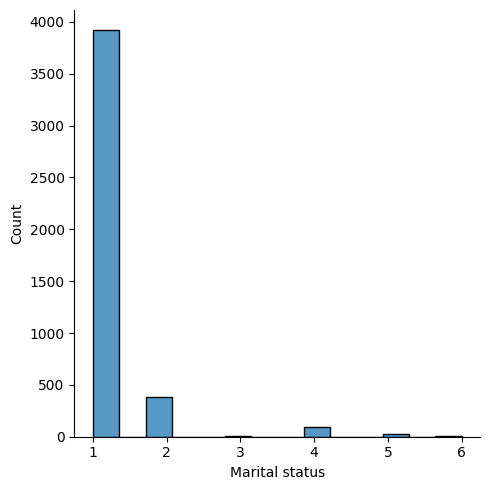

In [ ]:
# Displot for Marital status
# Possible marital status: single, married, widowed, divorced, separated, registered partnership
sns.displot(data=df_sch, x='Marital status')
plt.show()
# Can assume code '1' (most common) means "single" since these are students

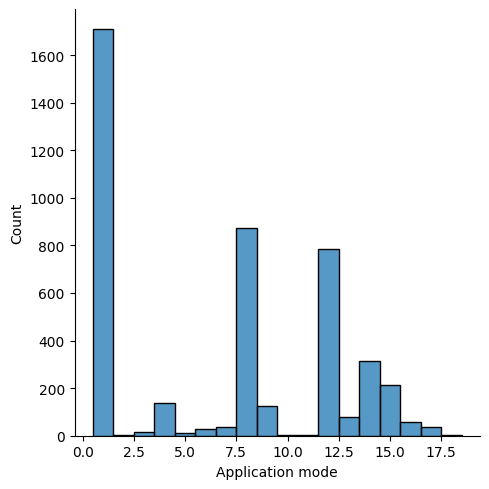

In [ ]:
# Displot for Application mode
sns.displot(data=df_sch, x='Application mode', discrete=True)
plt.show()

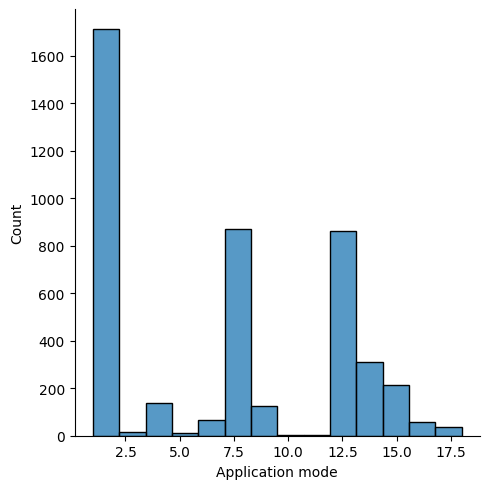

In [ ]:
sns.displot(data=df_sch, x='Application mode', kind='hist')
plt.show()
# Could be early decision, regular admission and so on

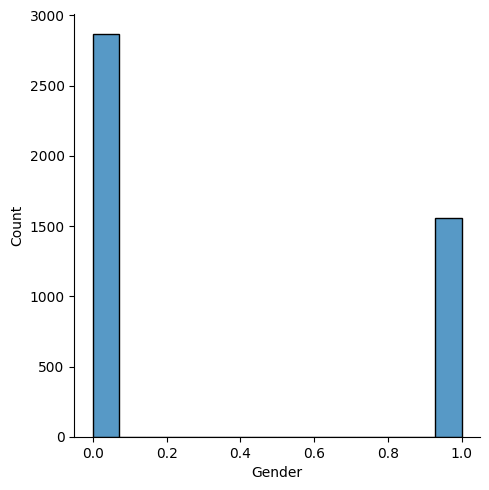

In [ ]:
sns.displot(data=df_sch, x='Gender', kind='hist', palette='husl')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

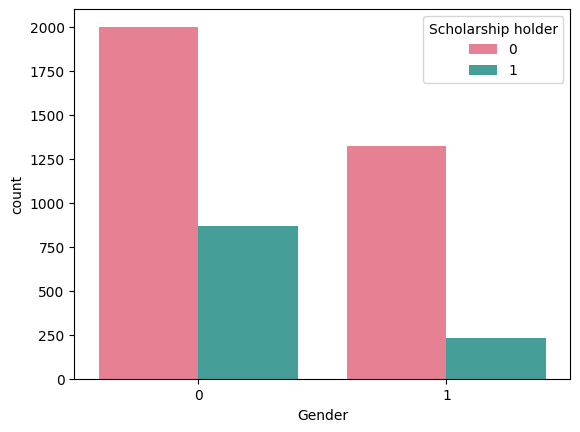

In [ ]:
# Scholarship and non-scholarship holders based on gender
sns.countplot(data=df_sch, x='Gender', hue='Scholarship holder', palette='husl')

<Axes: xlabel="Mother's qualification", ylabel='count'>

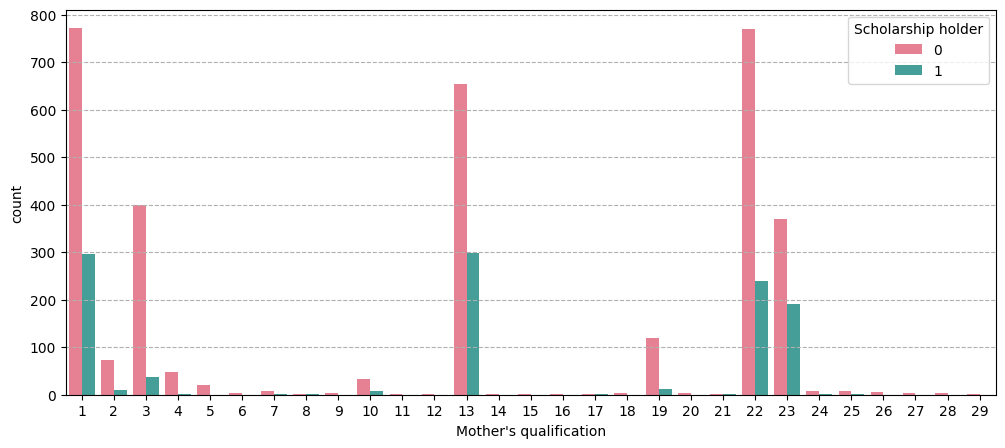

In [ ]:
plt.figure(figsize=(12,5))
plt.grid(linestyle='--', axis='y')
sns.countplot(data=df_sch, x="Mother's qualification", hue='Scholarship holder', palette='husl')

<Axes: xlabel="Father's qualification", ylabel='count'>

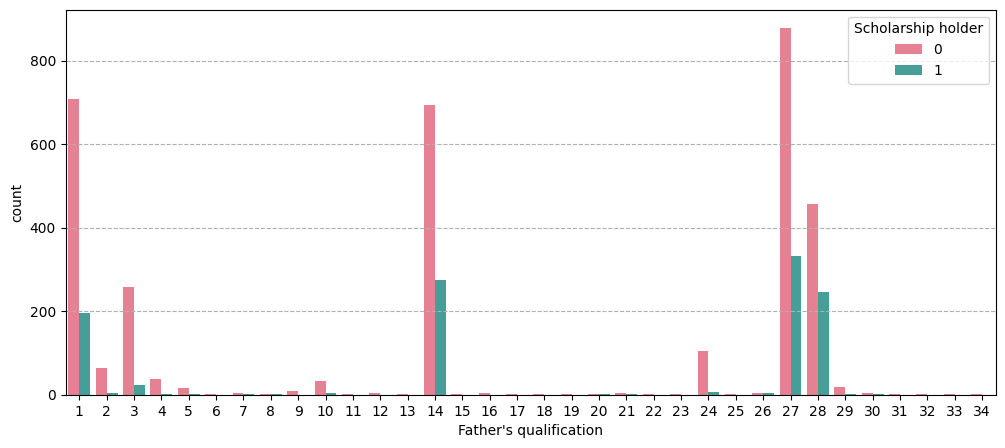

In [ ]:
plt.figure(figsize=(12,5))
plt.grid(linestyle='--', axis='y')
sns.countplot(data=df_sch, x="Father's qualification", hue="Scholarship holder", palette='husl')

<Axes: xlabel='Debtor', ylabel='count'>

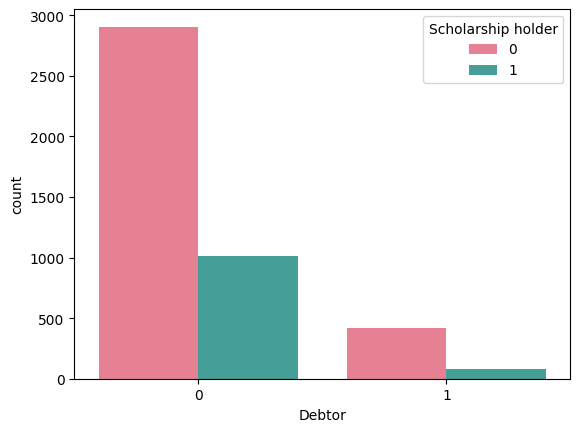

In [ ]:
sns.countplot(data=df_sch, x="Debtor", hue="Scholarship holder", palette='husl')

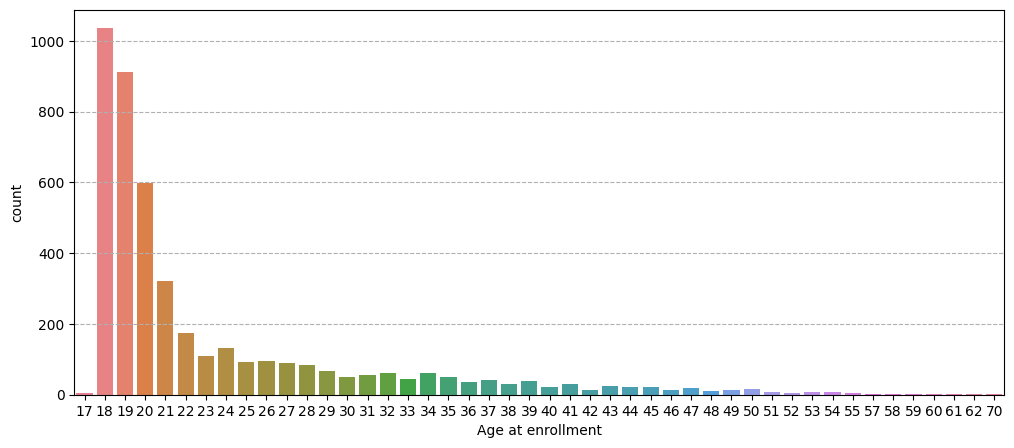

In [ ]:
# Countplot for Age at enrollment
# Can add back hue="Scholarship holder" to check distribution amongst each age bin
plt.figure(figsize=(12,5))
plt.grid(linestyle='--', axis='y')
sns.countplot(data=df_sch, x="Age at enrollment", palette='husl')
plt.show()

### 3.2 EDA Focus 1: Distribution of curricular units

Average Number of Curricular Units per Student: 13.75


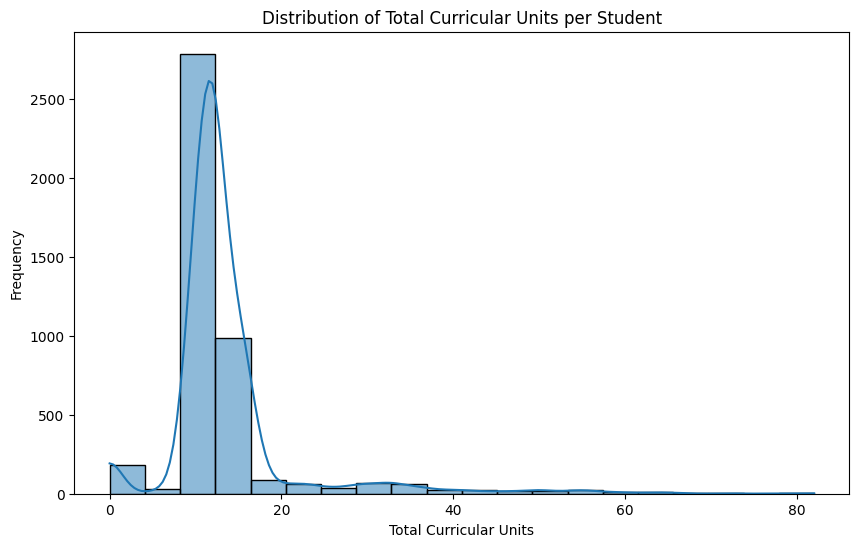

In [ ]:
## Finding out the average number of curricular units that each student takes
curricular_columns = ['CU 1 (credited)', 'CU 2 (credited)', 'CU 1 (enrolled)', 'CU 2 (enrolled)']
df_sch['Total Curricular Units'] = df_sch[curricular_columns].sum(axis=1)
average_curricular_units = df_sch['Total Curricular Units'].mean()
print(f"Average Number of Curricular Units per Student: {average_curricular_units:.2f}")

# Visualize the distribution of curricular units
plt.figure(figsize=(10, 6))
sns.histplot(df_sch['Total Curricular Units'], bins=20, kde=True)
plt.title('Distribution of Total Curricular Units per Student')
plt.xlabel('Total Curricular Units')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_sch = df_sch.drop('Total Curricular Units', axis=1)

### 3.3 EDA Focus 2a: Attendance and Course Performance

In [ ]:
df_sch['Attendance'].value_counts()
#Assume that 1 = Daytime and 0 = evening

1    3941
0     483
Name: Attendance, dtype: int64

**CORRELATION BETWEEN ATTENDANCE VS CU 1 GRADE**

In [ ]:
from scipy.stats import pearsonr, pointbiserialr
# Calculate Point-Biserial correlation coefficient and p-value
point_biserial_corr, point_biserial_p_value = pointbiserialr(df_sch['Attendance'], df_sch['CU 1 (grade)'])

print(f"Point-Biserial correlation coefficient: {point_biserial_corr}")
print(f"P-value for Point-Biserial correlation: {point_biserial_p_value}")

Point-Biserial correlation coefficient: 0.06397387191486507
P-value for Point-Biserial correlation: 2.0602063294390806e-05


Since the correlation coefficient is close to zero, it suggests a very weak positive correlation between attendance and grades

**CORRELATION BETWEEN ATTENDANCE AND CU 2 GRADE**

In [ ]:
# Calculate Point-Biserial correlation coefficient and p-value
point_biserial_corr, point_biserial_p_value = pointbiserialr(df_sch['Attendance'], df_sch['CU 2 (grade)'])

print(f"Point-Biserial correlation coefficient: {point_biserial_corr}")
print(f"P-value for Point-Biserial correlation: {point_biserial_p_value}")

Point-Biserial correlation coefficient: 0.050493252587705414
P-value for Point-Biserial correlation: 0.0007803855703042042


There is a very weak positive relationship between attendance and grades

**CORRELATION BETWEEN ATTENDANCE VS TARGET**

In [ ]:
# point_biserial_corr, point_biserial_p_value = pointbiserialr(df_sch['Target'], df_sch['Attendance'])

# # Display results
# print(f"Point-Biserial correlation coefficient: {point_biserial_corr}")
# print(f"P-value for Point-Biserial correlation: {point_biserial_p_value}")

### 3.4 EDA Focus 2b: Scholarship Status and Course Performance

In [ ]:
#which ages (range) do not have any scholarship receipients
# Identify columns where scholarship holder = 1
# Count the number of rows where the value in 'Scholarship holder' is 1
num_scholarship_holder = len(df_sch[df_sch['Scholarship holder'] == 1])
num_scholarship_holder

1099

In [ ]:
# Filter rows where 'Scholarship holder' is 1 and extract the corresponding 'Age at enrollment'
age_of_scholarship_holders = df_sch.loc[df_sch['Scholarship holder'] == 1, 'Age at enrollment']

# Display the result
print("Age of scholarship holders:")
print(age_of_scholarship_holders)

Age of scholarship holders:
6       18
8       21
11      18
13      21
14      18
        ..
4410    20
4412    19
4417    20
4421    30
4422    20
Name: Age at enrollment, Length: 1099, dtype: int64


In [ ]:
# Find the minimum and maximum age of scholarship holders
min_age = age_of_scholarship_holders.min()
max_age = age_of_scholarship_holders.max()

# Display the result
print("Minimum age of scholarship holders:", min_age)
print("Maximum age of scholarship holders:", max_age)

Minimum age of scholarship holders: 17
Maximum age of scholarship holders: 53


In [ ]:
# Find the index numbers where 'scholarship_holder' is 1
index_of_scholarship_holders = df_sch[df_sch['Scholarship holder'] == 1].index

# Display the result
print("Index numbers of scholarship holders:")
print(index_of_scholarship_holders)

Index numbers of scholarship holders:
Int64Index([   6,    8,   11,   13,   14,   20,   23,   25,   47,   48,
            ...
            4396, 4398, 4399, 4403, 4405, 4410, 4412, 4417, 4421, 4422],
           dtype='int64', length=1099)


In [ ]:
# Extract data from other columns based on the index numbers
scholarship_holders_data = df_sch.loc[index_of_scholarship_holders]

# Display the result
print("Data of scholarship holders:")
print(scholarship_holders_data)

Data of scholarship holders:
      Marital status  Application mode  Application order  Course  Attendance  \
6                  1                 1                  1      12           1   
8                  1                 1                  3      10           1   
11                 1                 1                  1      12           1   
13                 1                17                  1      11           1   
14                 1                 1                  1       6           1   
...              ...               ...                ...     ...         ...   
4410               1                 1                  1       5           1   
4412               1                14                  1       5           1   
4417               1                 1                  1       5           1   
4421               1                 1                  1      12           1   
4422               1                 1                  1       9           1   

<Axes: xlabel='CU 1 (approved)', ylabel='count'>

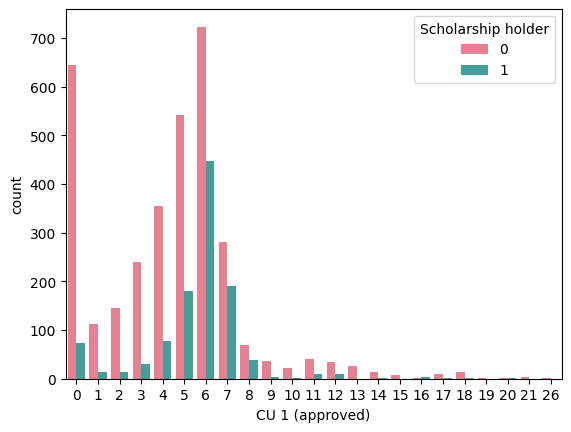

In [ ]:
sns.countplot(data=df_sch, x='CU 1 (approved)', hue='Scholarship holder', palette='husl')

<Axes: xlabel='CU 2 (approved)', ylabel='count'>

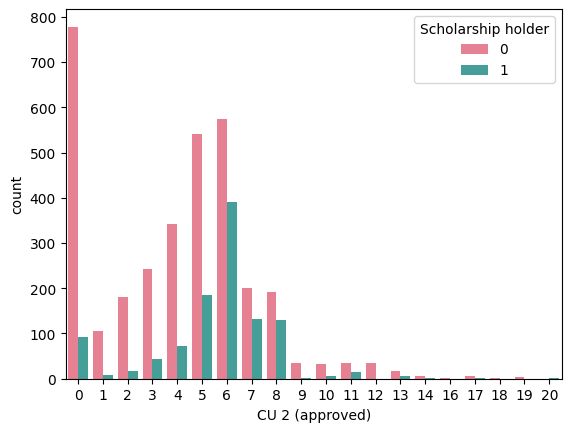

In [ ]:
sns.countplot(data=df_sch, x='CU 2 (approved)', hue='Scholarship holder', palette='husl')

<Axes: xlabel='Target', ylabel='count'>

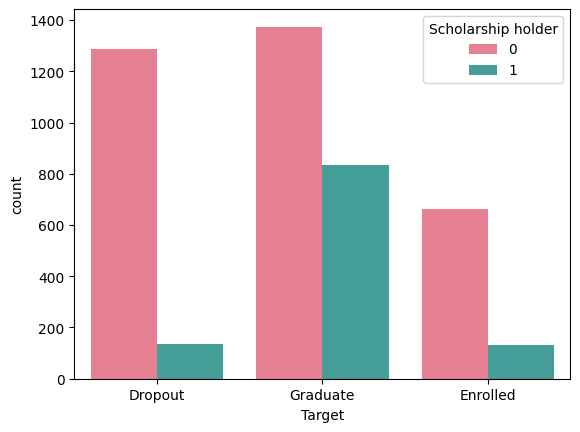

In [ ]:
sns.countplot(data=df_sch, x='Target', hue='Scholarship holder', palette='husl')

### 3.5 EDA Focus 3:
How do economic factors like unemployment rate, inflation rate, and GDP impact student performance?

<Figure size 1200x800 with 0 Axes>

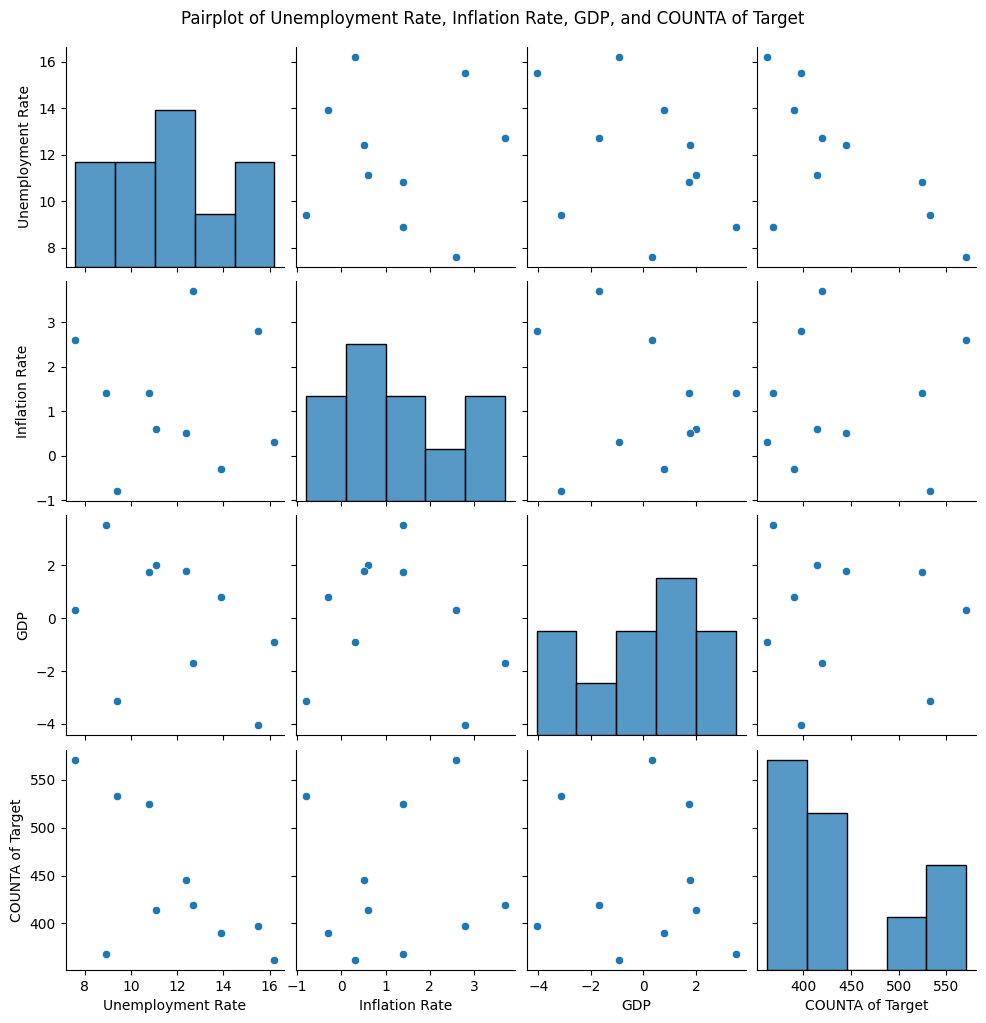

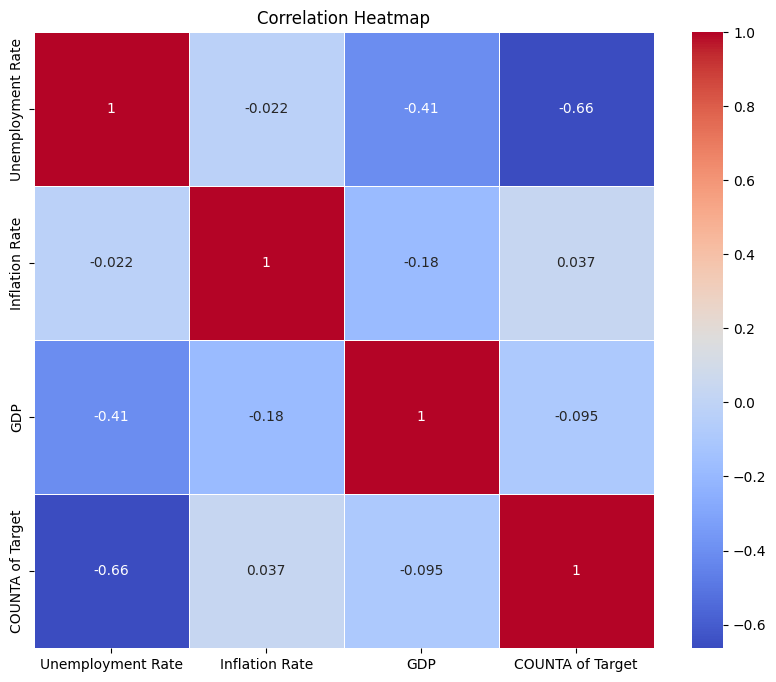

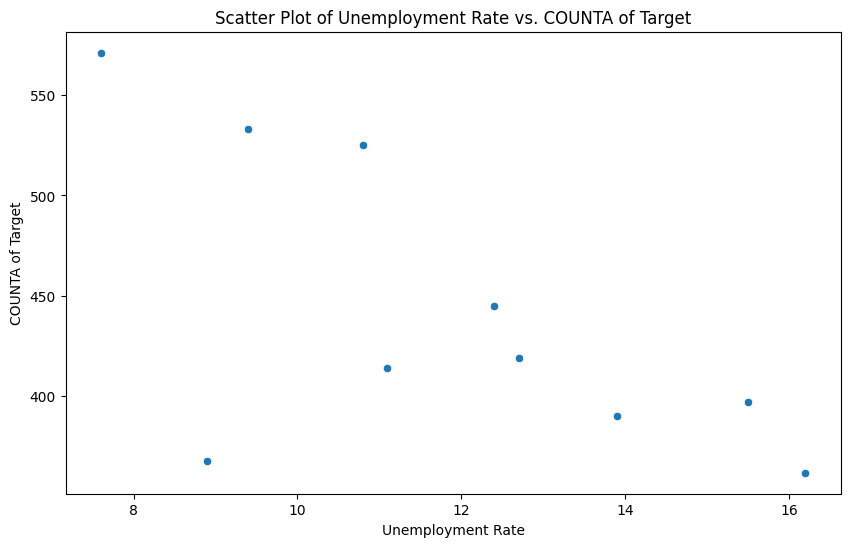

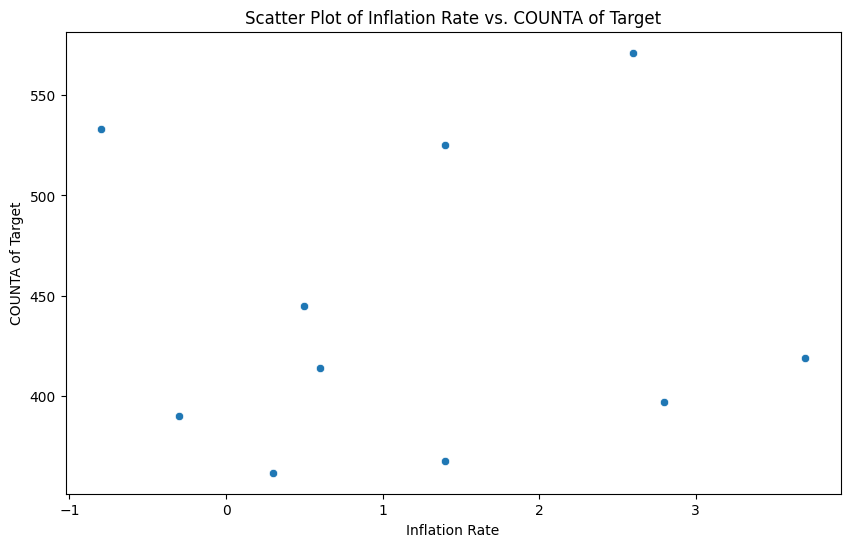

In [ ]:
#OVERALL WITH SECONDARY ENVIRONMENTAL FACTOR ANALYSIS


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the provided data
data = {
    'Unemployment Rate': [7.6, 8.9, 9.4, 10.8, 11.1, 12.4, 12.7, 13.9, 15.5, 16.2],
    'Inflation Rate': [2.6, 1.4, -0.8, 1.4, 0.6, 0.5, 3.7, -0.3, 2.8, 0.3],
    'GDP': [0.32, 3.51, -3.12, 1.74, 2.02, 1.79, -1.7, 0.79, -4.06, -0.92],
    'COUNTA of Target': [571, 368, 533, 525, 414, 445, 419, 390, 397, 362]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))

# Pairplot for overall relationship
sns.pairplot(df)
plt.suptitle('Pairplot of Unemployment Rate, Inflation Rate, GDP, and COUNTA of Target', y=1.02)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

# Scatter plot of Unemployment Rate vs. COUNTA of Target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment Rate', y='COUNTA of Target', data=df)
plt.title('Scatter Plot of Unemployment Rate vs. COUNTA of Target')

# Scatter plot of Inflation Rate vs. COUNTA of Target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inflation Rate', y='COUNTA of Target', data=df)
plt.title('Scatter Plot of Inflation Rate vs. COUNTA of Target')

plt.show()

<Figure size 1200x800 with 0 Axes>

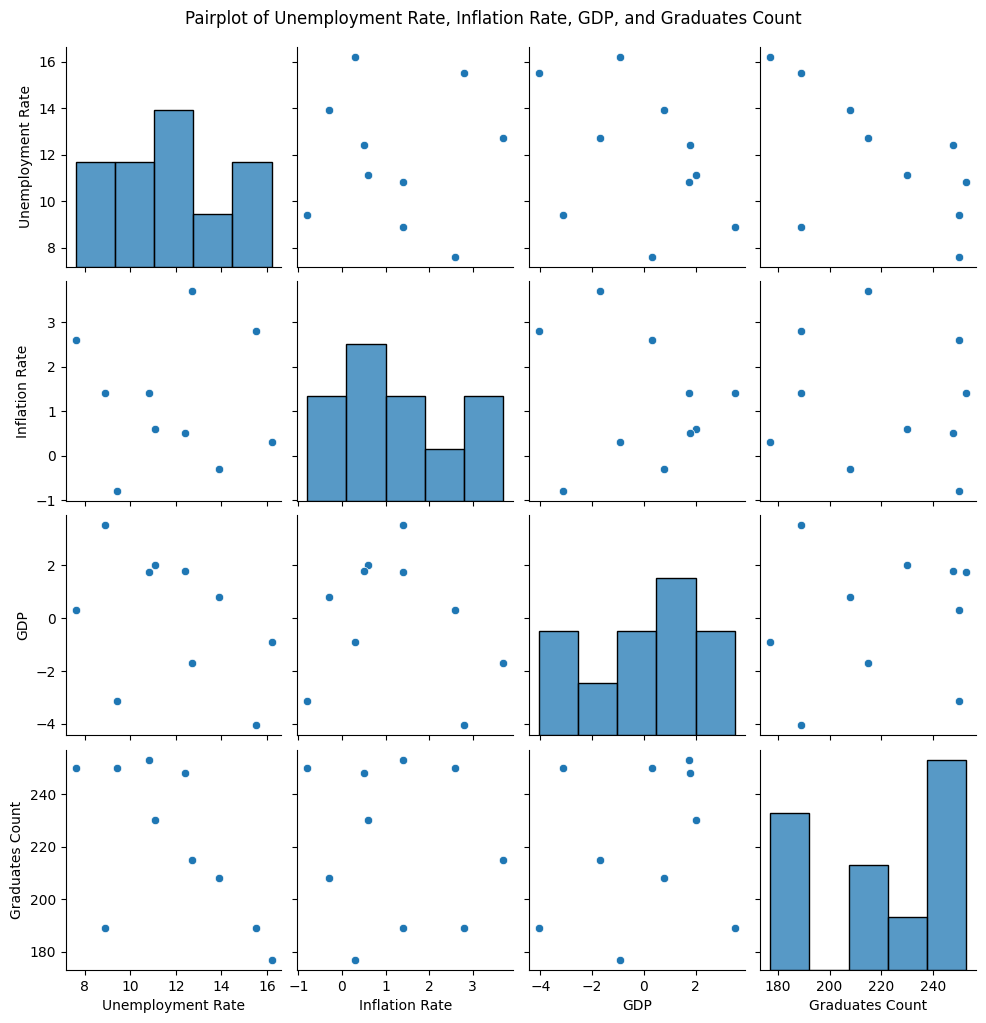

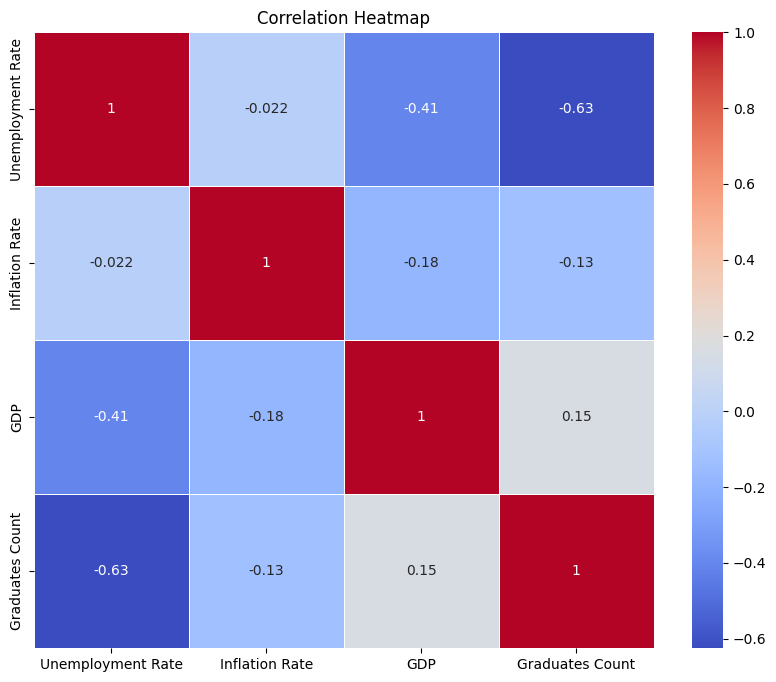

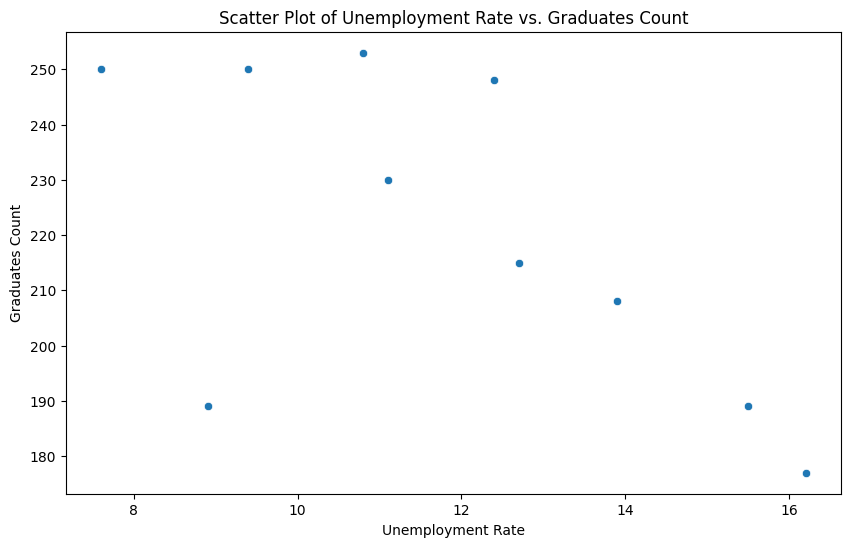

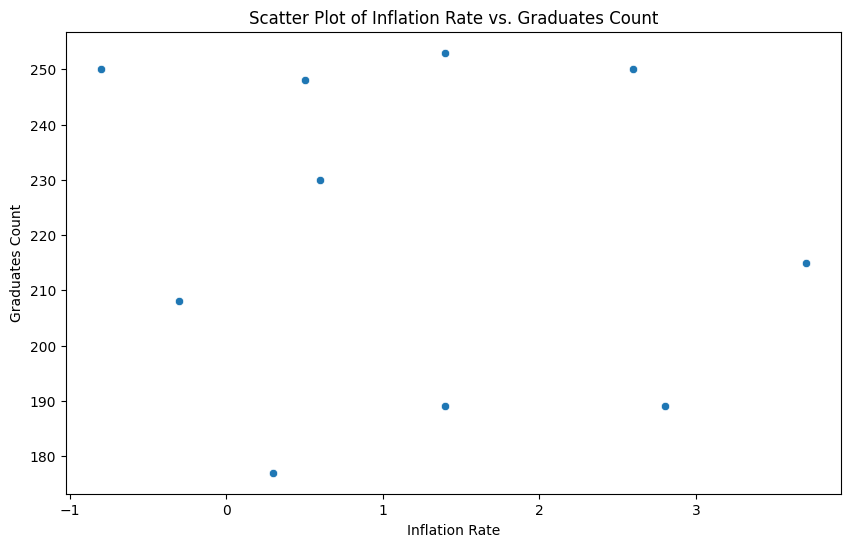

In [ ]:
#GRADUATES ONLY WITH SECONDARY ENVIRONMENTAL FACTOR ANALYSIS


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the provided data
data = {
    'Unemployment Rate': [7.6, 8.9, 9.4, 10.8, 11.1, 12.4, 12.7, 13.9, 15.5, 16.2],
    'Inflation Rate': [2.6, 1.4, -0.8, 1.4, 0.6, 0.5, 3.7, -0.3, 2.8, 0.3],
    'GDP': [0.32, 3.51, -3.12, 1.74, 2.02, 1.79, -1.7, 0.79, -4.06, -0.92],
    'Graduates Count': [250, 189, 250, 253, 230, 248, 215, 208, 189, 177]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))

# Pairplot for overall relationship
sns.pairplot(df)
plt.suptitle('Pairplot of Unemployment Rate, Inflation Rate, GDP, and Graduates Count', y=1.02)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

# Scatter plot of Unemployment Rate vs. Graduates Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment Rate', y='Graduates Count', data=df)
plt.title('Scatter Plot of Unemployment Rate vs. Graduates Count')

# Scatter plot of Inflation Rate vs. Graduates Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inflation Rate', y='Graduates Count', data=df)
plt.title('Scatter Plot of Inflation Rate vs. Graduates Count')

plt.show()

<Figure size 1200x800 with 0 Axes>

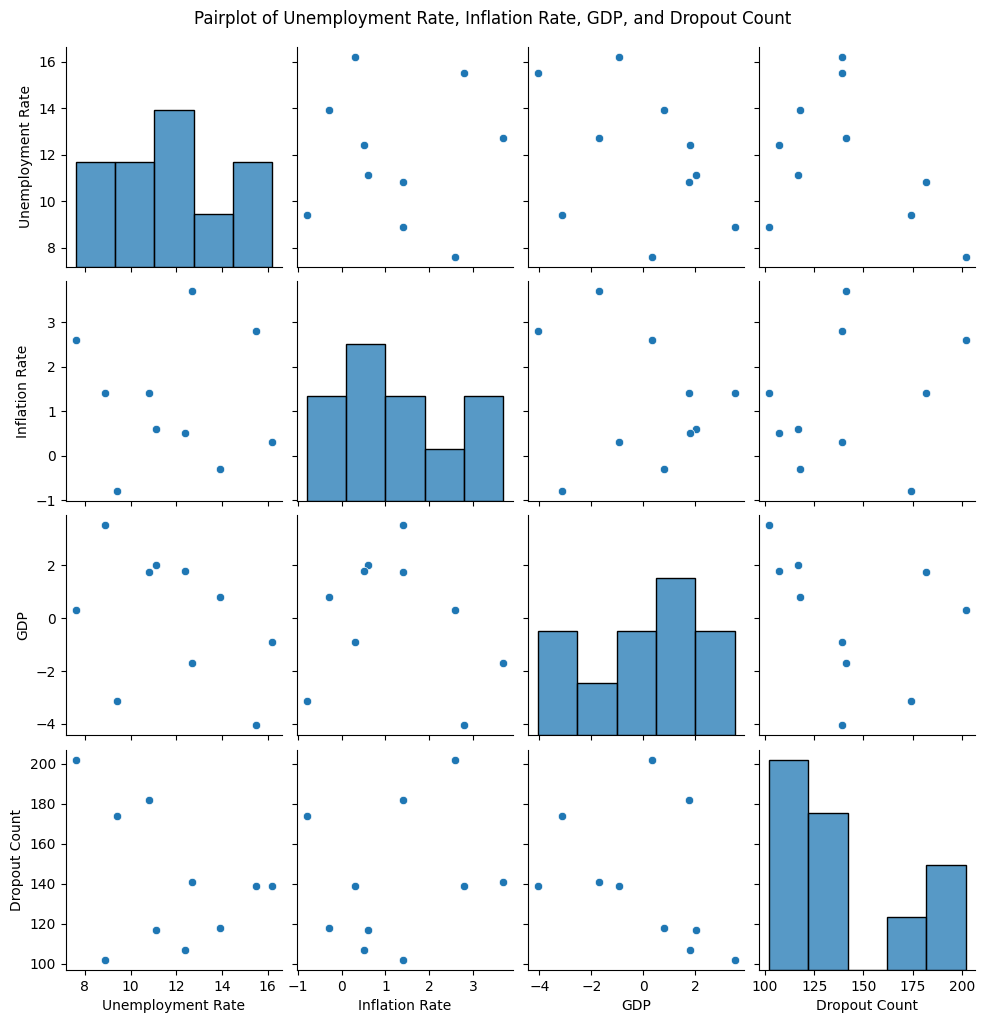

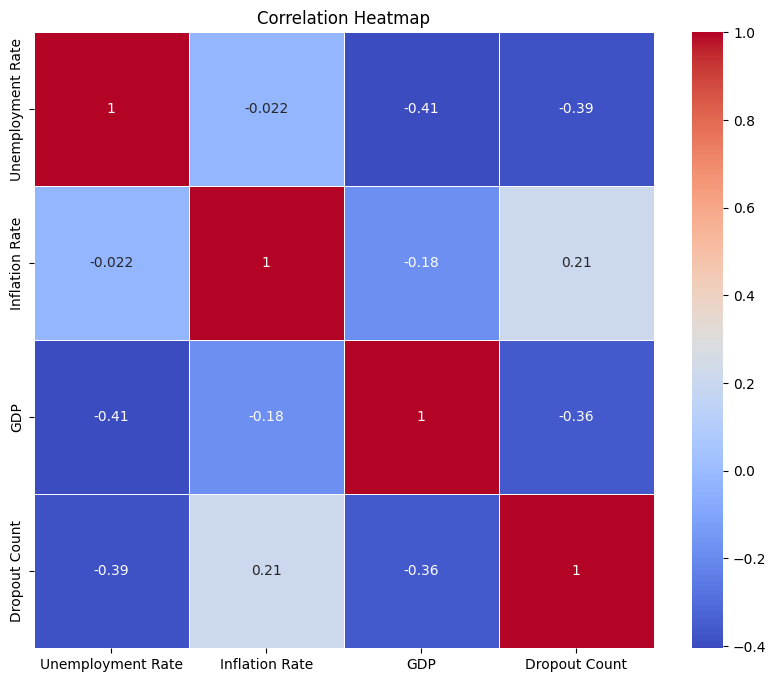

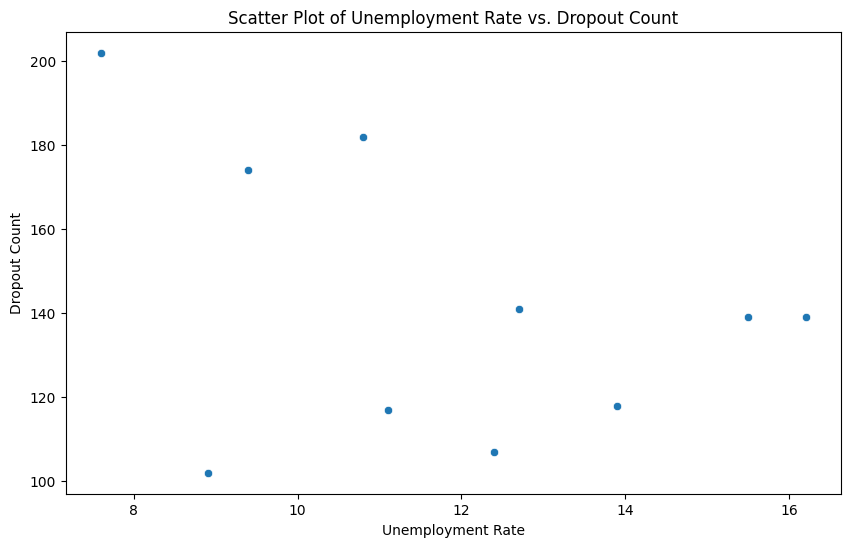

In [ ]:
#DROPOUT W ENVIRONMENT SECONDARY ENVIRONMENTAL FACTOR ANALYSIS


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the provided data
data = {
    'Unemployment Rate': [7.6, 8.9, 9.4, 10.8, 11.1, 12.4, 12.7, 13.9, 15.5, 16.2],
    'Inflation Rate': [2.6, 1.4, -0.8, 1.4, 0.6, 0.5, 3.7, -0.3, 2.8, 0.3],
    'GDP': [0.32, 3.51, -3.12, 1.74, 2.02, 1.79, -1.7, 0.79, -4.06, -0.92],
    'Dropout Count': [202, 102, 174, 182, 117, 107, 141, 118, 139, 139]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))

# Pairplot for overall relationship
sns.pairplot(df)
plt.suptitle('Pairplot of Unemployment Rate, Inflation Rate, GDP, and Dropout Count', y=1.02)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

# Scatter plot of Unemployment Rate vs. Dropout Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment Rate', y='Dropout Count', data=df)
plt.title('Scatter Plot of Unemployment Rate vs. Dropout Count')

plt.show()

### 3.6 Big Heatmap!

Text(0, -0.5, 'Heatmap of Data')

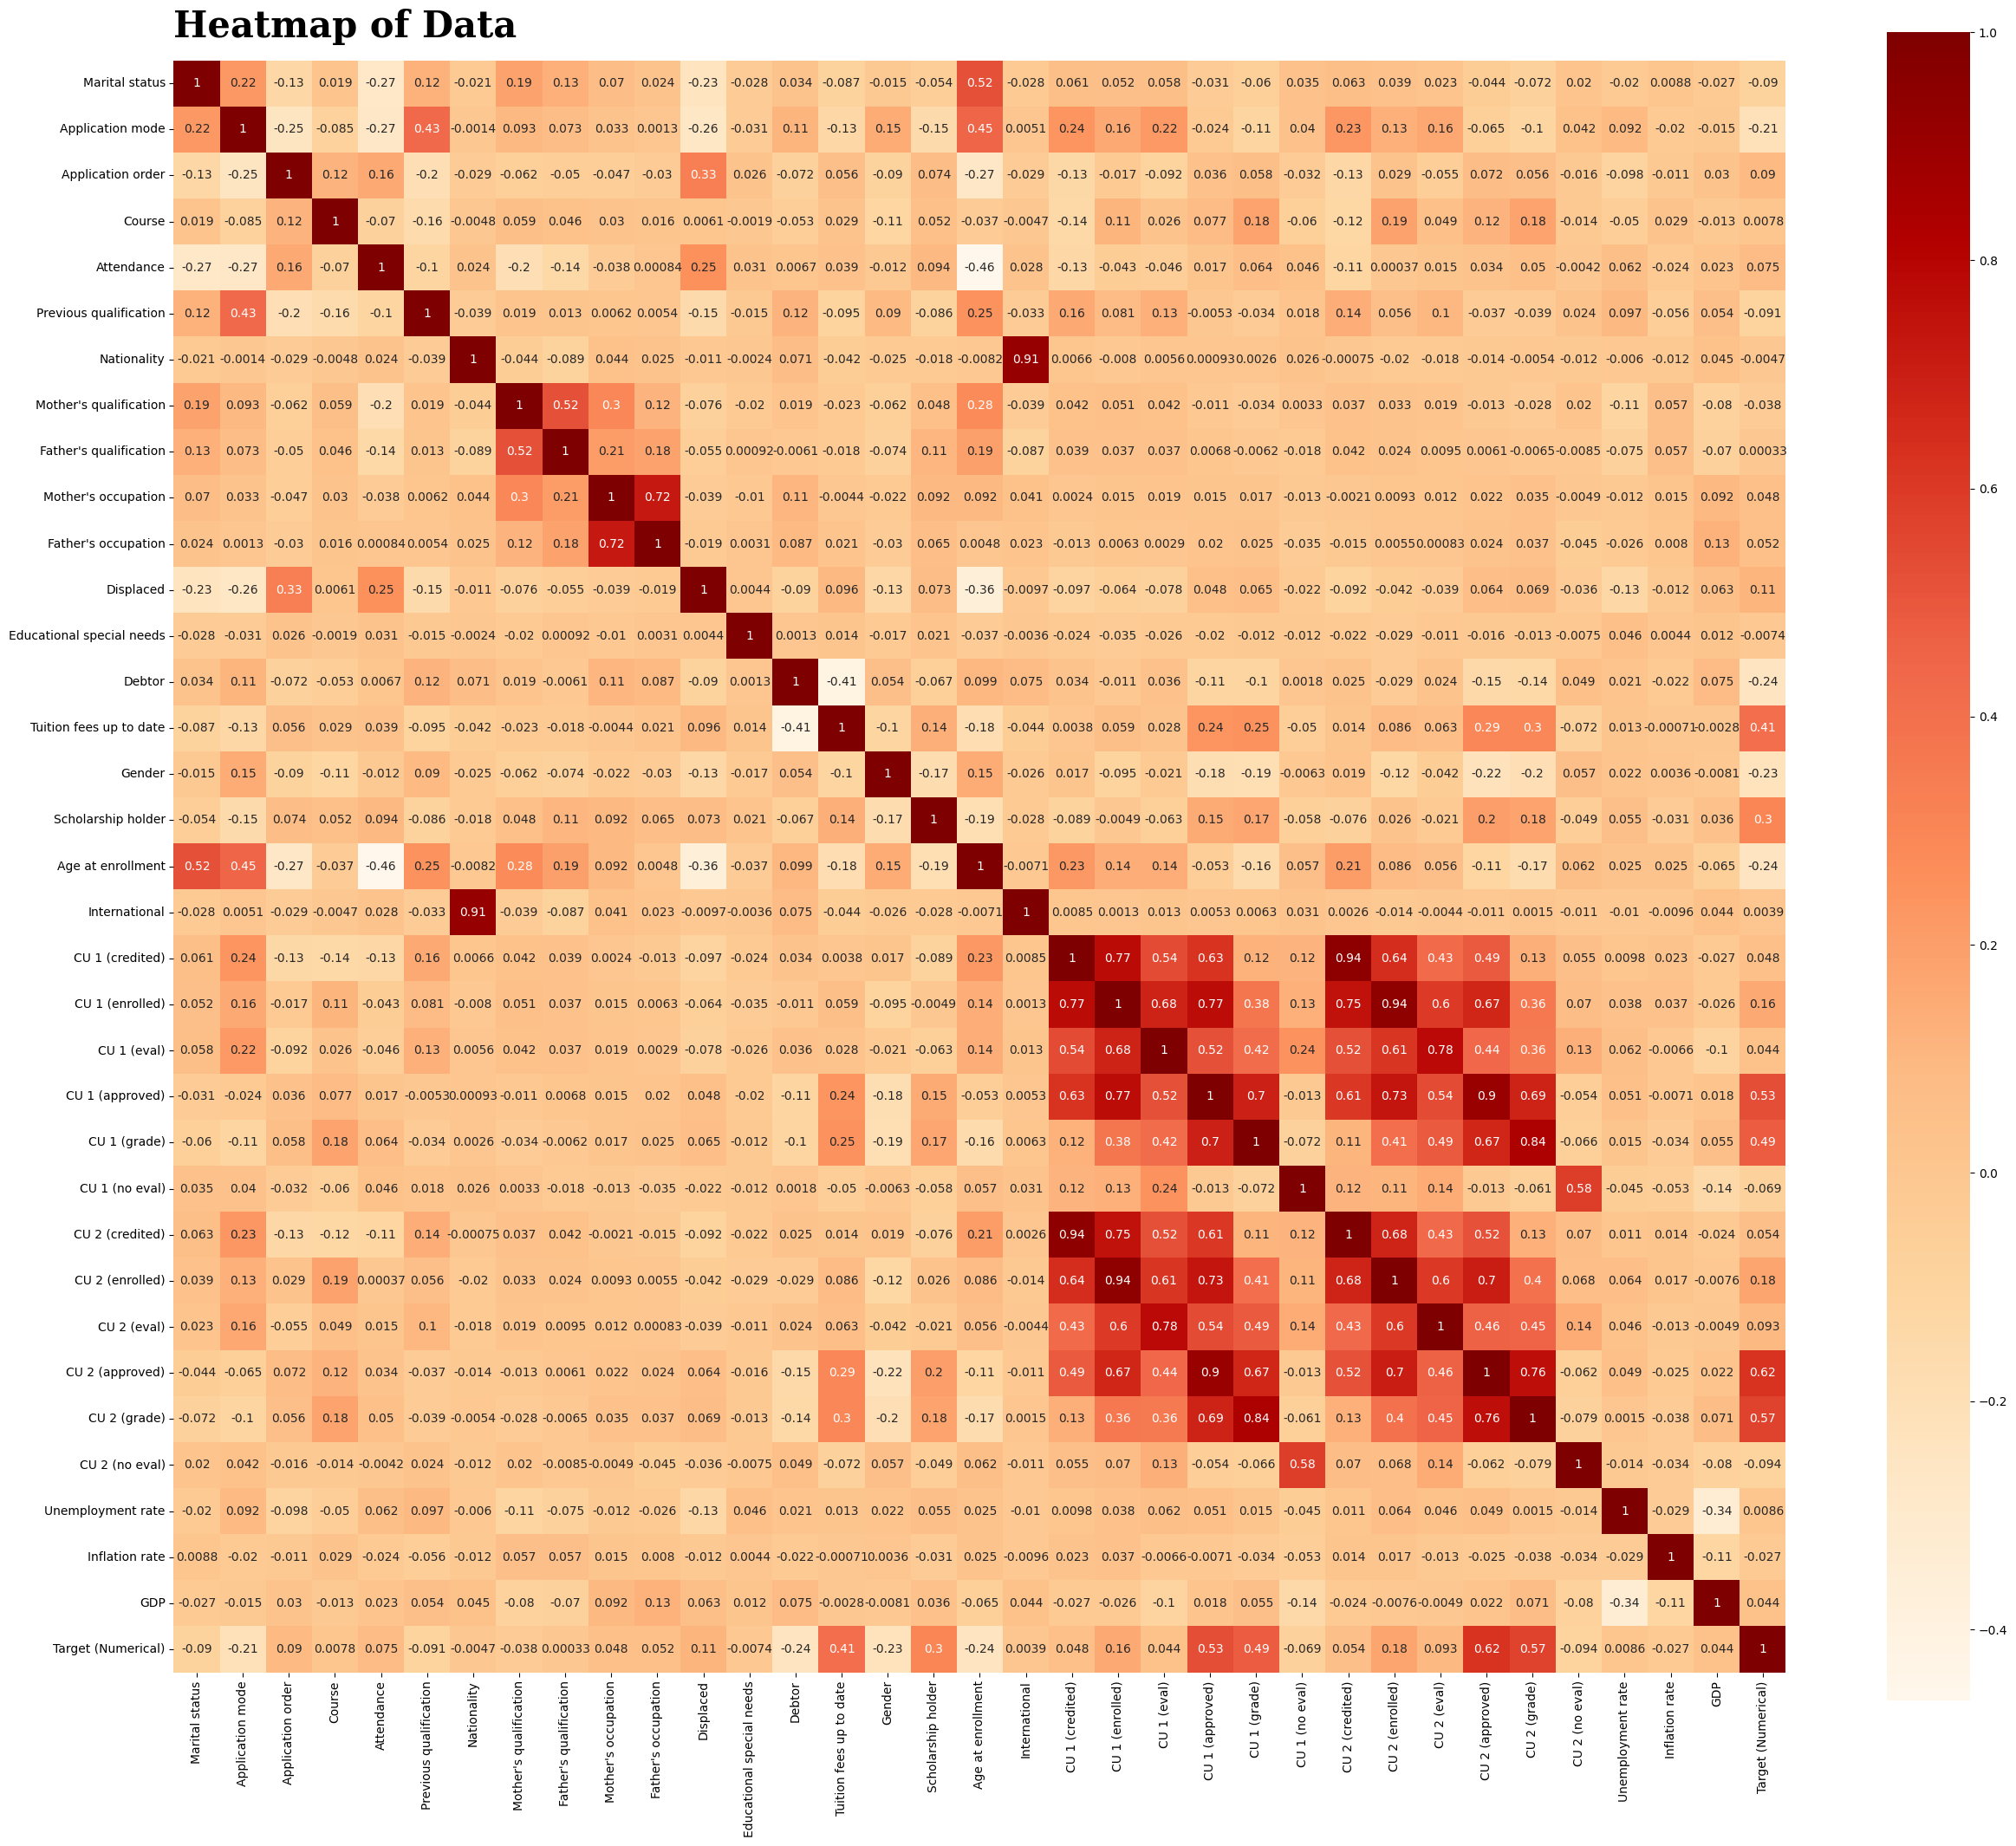

In [ ]:
### Comment/Uncomment the large heatmap for document readibility sake

### Setting up figure space area
fig = plt.figure(figsize=(30,25), dpi=100)
gs = fig.add_gridspec(1,1)

### Adding axes for subplotting
ax0 = fig.add_subplot(gs[0,0])

### Adding background colour
background_color = 'white'
fig.patch.set_facecolor(background_color)


### Creating heatmap of numerical data
corrmat = df_sch.corr()
sns.heatmap(ax=ax0, data=corrmat, annot=True, cmap="OrRd",square=True)

### Creating heatmap title
plt.text(x=0, y=-0.5, s='Heatmap of Data', fontsize=30, fontweight='bold', fontfamily='serif')

Observation: Multicollinearity observed between columns 'Nationality' and 'International' can be disregarded; they are not independent variables per-se.

### 3.7 Small heatmap!

<Axes: >

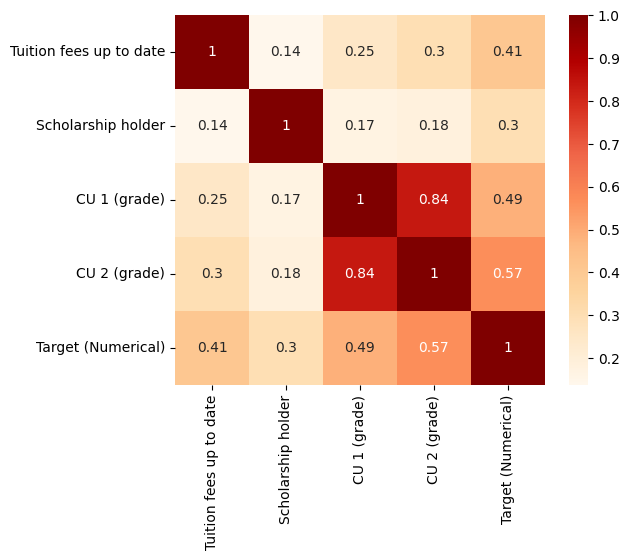

In [ ]:
fig = plt.figure(dpi=100)
fig.patch.set_facecolor('white')

# Choose which columns we want specifically
selected_columns = ['Tuition fees up to date', 'Scholarship holder', 'CU 1 (grade)', 'CU 2 (grade)', 'Target (Numerical)']

# Plotting correlation matrix
corrmat1 = df_sch[selected_columns].corr()
sns.heatmap(data=corrmat1, annot=True, cmap="OrRd", square=True)

<Axes: xlabel='Target', ylabel='count'>

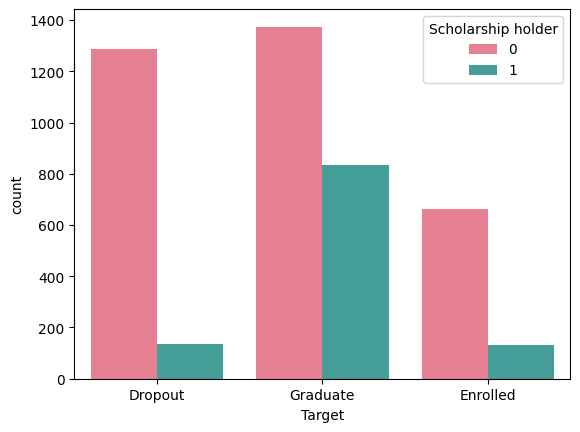

In [ ]:
sns.countplot(data=df_sch, x='Target', hue='Scholarship holder', palette='husl')

<Axes: xlabel='CU 1 (approved)', ylabel='count'>

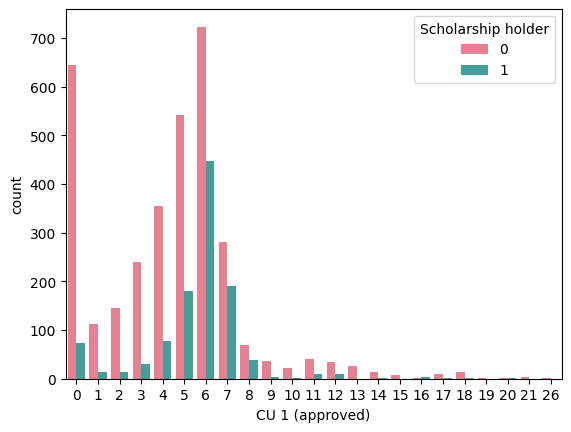

In [ ]:
sns.countplot(data=df_sch, x='CU 1 (approved)', hue='Scholarship holder', palette='husl')

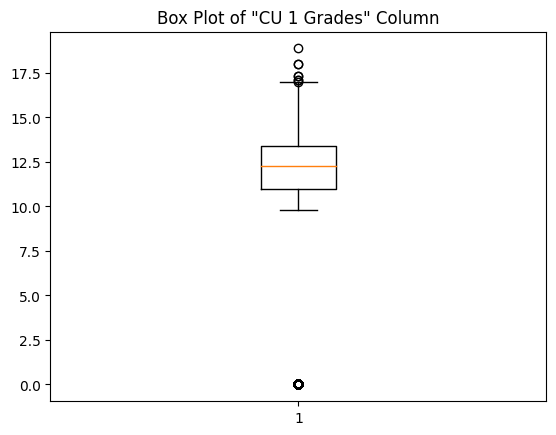

In [ ]:
#Performance of everyone
plt.boxplot(df_sch['CU 1 (grade)'])
plt.title('Box Plot of "CU 1 Grades" Column')
plt.show()

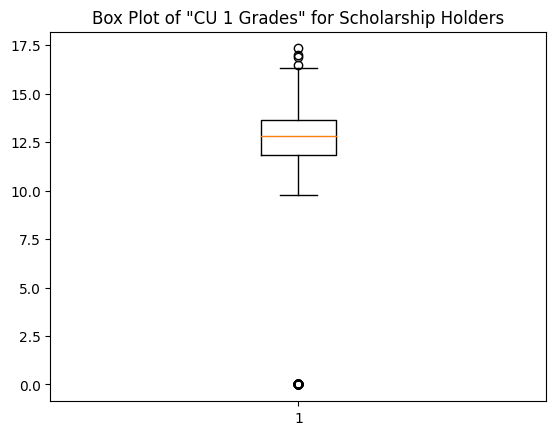

In [ ]:
# Performance of scholarship holders
plt.boxplot(df_sch[df_sch['Scholarship holder'] == 1]['CU 1 (grade)'])
plt.title('Box Plot of "CU 1 Grades" for Scholarship Holders')
plt.show()

In [ ]:
df_sch

,Marital status,Application mode,Application order,Course,Attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,CU 1 (credited),CU 1 (enrolled),CU 1 (eval),CU 1 (approved),CU 1 (grade),CU 1 (no eval),CU 2 (credited),CU 2 (enrolled),CU 2 (eval),CU 2 (approved),CU 2 (grade),CU 2 (no eval),Unemployment rate,Inflation rate,GDP,Target,Target (Numerical)
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate,2
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,0
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout,0
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,2


# 4. Further Data Cleaning
*   Further clean the data based on the specific requirements of your problem statement
*   Ensure data is in a suitable format for subsequent analysis
<br>




### 4.1 Creating a copy and removing non-essential columns

In [ ]:
# Creating a copy
df_sch_copy = df_sch.copy()

In [ ]:
df_sch_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Marital status             4424 non-null   int64  
 1   Application mode           4424 non-null   int64  
 2   Application order          4424 non-null   int64  
 3   Course                     4424 non-null   int64  
 4   Attendance                 4424 non-null   int64  
 5   Previous qualification     4424 non-null   int64  
 6   Nationality                4424 non-null   int64  
 7   Mother's qualification     4424 non-null   int64  
 8   Father's qualification     4424 non-null   int64  
 9   Mother's occupation        4424 non-null   int64  
 10  Father's occupation        4424 non-null   int64  
 11  Displaced                  4424 non-null   int64  
 12  Educational special needs  4424 non-null   int64  
 13  Debtor                     4424 non-null   int64

In [ ]:
#decided to keep only 4 variables - Tuition fees up to date, Scholarship holder, CU 1 (grade), CU 2 (grade)
##as these 4 variables has highest correlation to "Target" according to Big Heatmap
###so will be dropping all the other variables

columns_to_drop = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Attendance', 'Previous qualification', 'Nationality', "Mother's qualification",
    "Father's qualification", "Mother's occupation", "Father's occupation",
    'Displaced', 'Educational special needs', 'Debtor', 'Gender',
    'Age at enrollment', 'International', 'CU 1 (credited)', 'CU 1 (enrolled)',
    'CU 1 (eval)', 'CU 1 (approved)', 'CU 1 (no eval)', 'CU 2 (credited)',
    'CU 2 (enrolled)', 'CU 2 (eval)', 'CU 2 (approved)', 'CU 2 (no eval)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

df_sch_copy = df_sch.drop(columns=columns_to_drop)

df_sch_copy.head()

,Tuition fees up to date,Scholarship holder,CU 1 (grade),CU 2 (grade),Target,Target (Numerical)
0,1,0,0.000000,0.000000,Dropout,0
1,0,0,14.000000,13.666667,Graduate,2
2,0,0,0.000000,0.000000,Dropout,0
3,1,0,13.428571,12.400000,Graduate,2
4,1,0,12.333333,13.000000,Graduate,2


In [ ]:
df_sch_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tuition fees up to date  4424 non-null   int64  
 1   Scholarship holder       4424 non-null   int64  
 2   CU 1 (grade)             4424 non-null   float64
 3   CU 2 (grade)             4424 non-null   float64
 4   Target                   4424 non-null   object 
 5   Target (Numerical)       4424 non-null   int8   
dtypes: float64(2), int64(2), int8(1), object(1)
memory usage: 177.3+ KB


### 4.2 Feature Engineering - Creating 'Dropouts' column
Converts column 'Target' objects into 0s and 1s<br>
Enrolled/Graduate = 0<br>
Dropout = 1


In [ ]:
# Adding a column that takes our 'Target' column and converts the categorical objects into numeric
# Enrolled/Graduate = 0
# Dropout = 1
df_sch_copy['Dropouts'] = df_sch_copy['Target'].apply(lambda x: 0 if x in ['Enrolled', 'Graduate'] else 1)

In [ ]:
df_sch_copy.head()

,Tuition fees up to date,Scholarship holder,CU 1 (grade),CU 2 (grade),Target,Target (Numerical),Dropouts
0,1,0,0.000000,0.000000,Dropout,0,1
1,0,0,14.000000,13.666667,Graduate,2,0
2,0,0,0.000000,0.000000,Dropout,0,1
3,1,0,13.428571,12.400000,Graduate,2,0
4,1,0,12.333333,13.000000,Graduate,2,0


In [ ]:
# f_regressionig=plt.figure(figsize=(20,15),dpi=100)
# sns.pairplot(data=df_sch_copy,hue='Dropouts',size=2,palette='OrRd')
# plt.show()

# 5. Problem Statement
How can we accurately predict dropouts?

# 6. Data Visualization


*   Create visualizations to support & address your problem statements
*   Use bar charts, pie charts, and other relevant plots to represent your findings
*   Provide clear and concise visualizations to aid in the understanding of the dataset

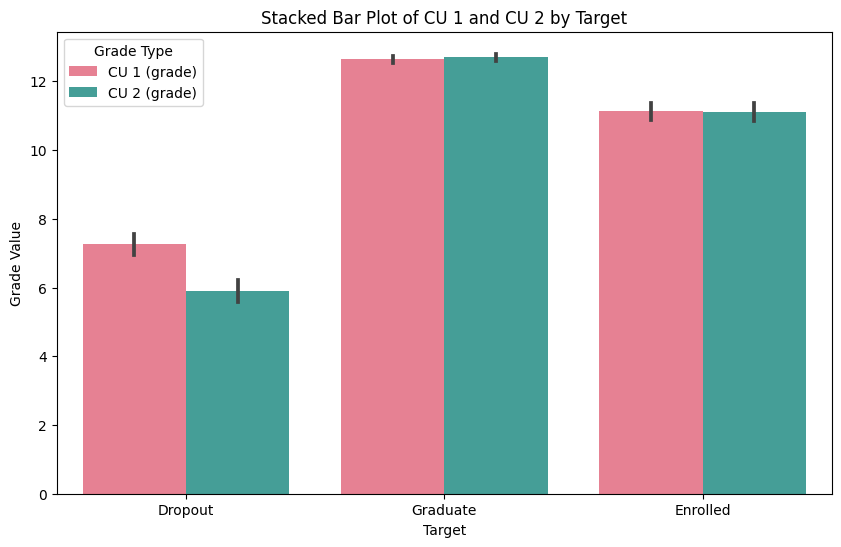

In [ ]:
plt.figure(figsize=(10, 6))

# Melt the DataFrame to have 'CU 1' and 'CU 2' as categorical variables
df_melted = df_sch_copy.melt(id_vars=['Target'], value_vars=['CU 1 (grade)', 'CU 2 (grade)'])

# Create a stacked bar plot
sns.barplot(x='Target', y='value', hue='variable', data=df_melted, palette='husl')

plt.xlabel('Target')
plt.ylabel('Grade Value')
plt.title('Stacked Bar Plot of CU 1 and CU 2 by Target')
plt.legend(title='Grade Type', loc='upper left')
plt.show()

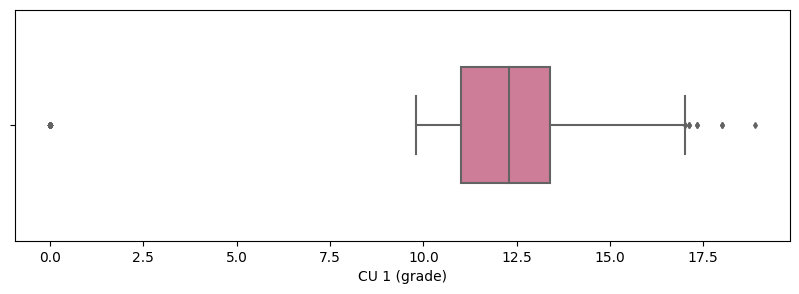

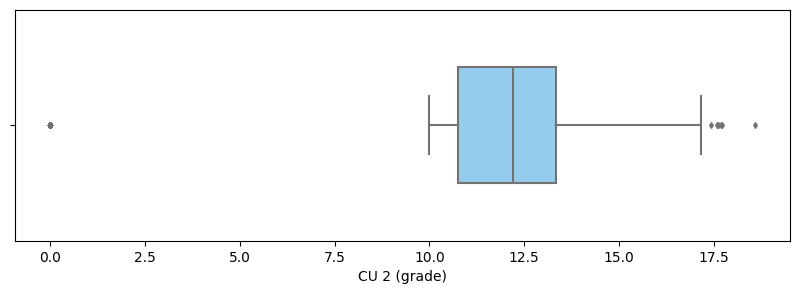

In [ ]:
#Box plot for CU 1 grade and CU2 grade
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_sch_copy, x='CU 1 (grade)', width=0.5, fliersize=3, color='palevioletred')
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(data=df_sch_copy, x='CU 2 (grade)', width=0.5, fliersize=3, color='lightskyblue')
plt.show()

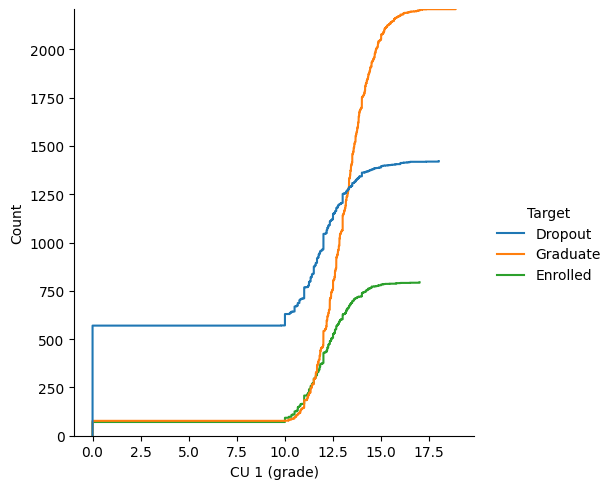

In [ ]:
#ECDF for CU1 grade
sns.displot(x='CU 1 (grade)',hue='Target',data=df_sch,kind='ecdf',stat='count')

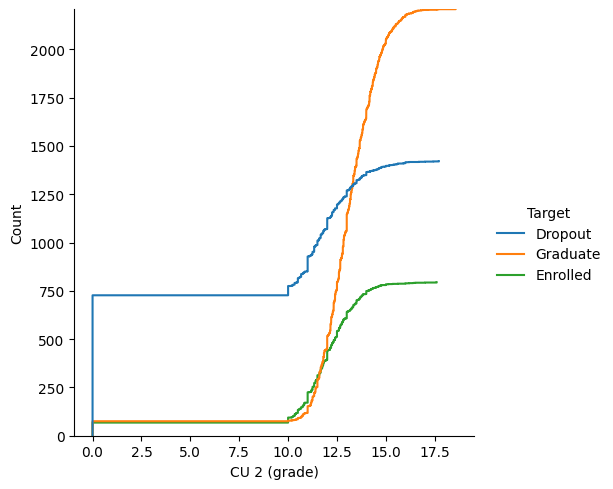

In [ ]:
#ECDF for CU2 grade
sns.displot(x='CU 2 (grade)',hue='Target',data=df_sch,kind='ecdf',stat='count')

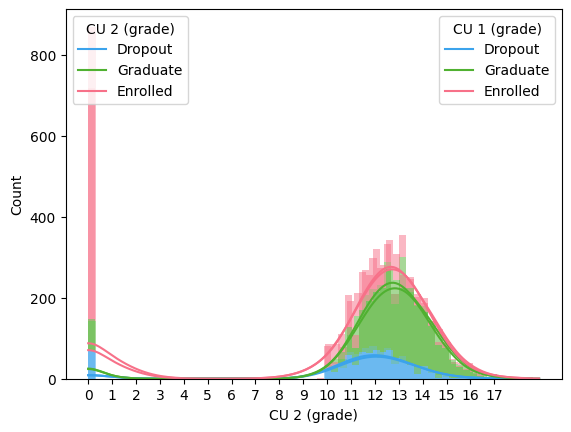

In [ ]:
#KDE
plot = sns.histplot(data=df_sch_copy, x='CU 2 (grade)', kde=True, edgecolor='none', hue='Target', palette='husl', multiple='stack')
sns.histplot(data=df_sch_copy, x='CU 1 (grade)', kde=True, edgecolor='none', hue='Target', palette='husl', multiple='stack', ax=plot)

x1 = list(range(0, 18))
plot.set_xticks(x1)

# Add separate legends for CU 1 and CU 2
legend_cu1 = plt.legend(title='CU 1 (grade)', labels=df_sch_copy['Target'].unique(), loc='upper right')
legend_cu2 = plot.legend(title='CU 2 (grade)', labels=df_sch_copy['Target'].unique(), loc='upper left')

# Add the legends to the plot
plt.gca().add_artist(legend_cu1)
plt.show()

<Figure size 1000x600 with 0 Axes>

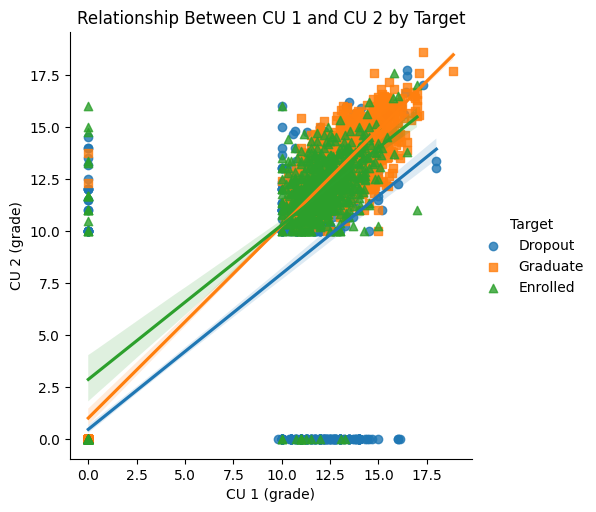

In [ ]:
#Scatter plot to show relationship between CU 1na dCU2 grades with relation to target (with distinct marker style)
plt.figure(figsize=(10, 6))

#marker style
sns.lmplot(x="CU 1 (grade)", y="CU 2 (grade)", hue="Target", markers=['o', 's', '^'], data=df_sch_copy)

#title
plt.title('Relationship Between CU 1 and CU 2 by Target')

plt.show()

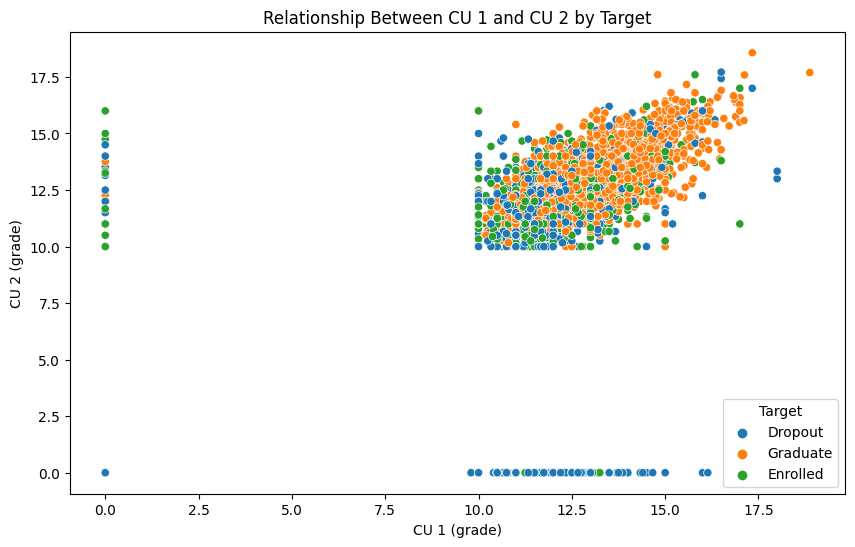

In [ ]:
#Scatter plot to show relationship between CU 1na dCU2 grades with relation to target
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='CU 1 (grade)', y='CU 2 (grade)', hue='Target', markers=['o', 's', '^'], data=df_sch_copy)

# Adding a title
plt.title('Relationship Between CU 1 and CU 2 by Target')

plt.show()

Pie chart of Target

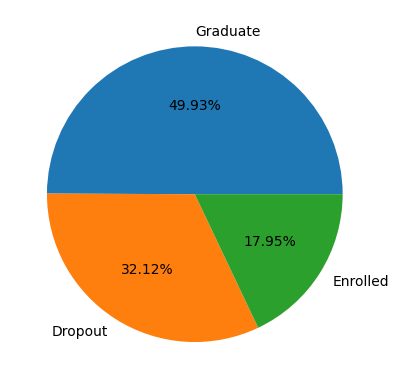

In [ ]:
dropouts = df_sch_copy.query('Dropouts == 0')
target_values = df_sch_copy.Target.value_counts()
plt.pie(target_values.values, labels = target_values.index, autopct = "%.2f%%" )
plt.show()

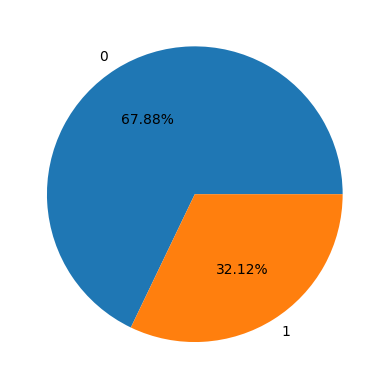

In [ ]:
dropouts_values = df_sch_copy.Dropouts.value_counts()
plt.pie(dropouts_values.values, labels = dropouts_values.index, autopct = "%.2f%%" )
plt.show()

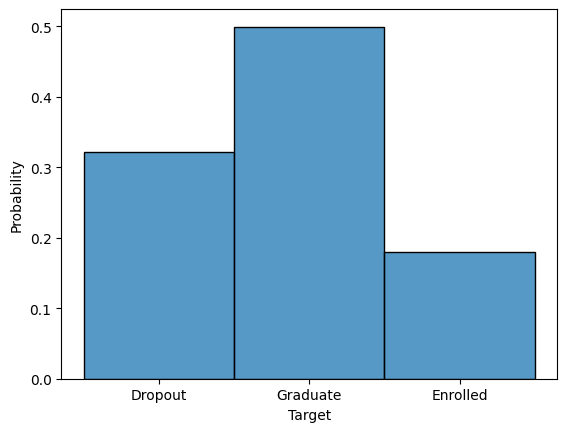

In [ ]:
#Bar chart of Probability of Target
sns.histplot(x=df_sch_copy['Target'],
             bins=10, kde=False,
             stat="probability",
             palette='husl'
            );

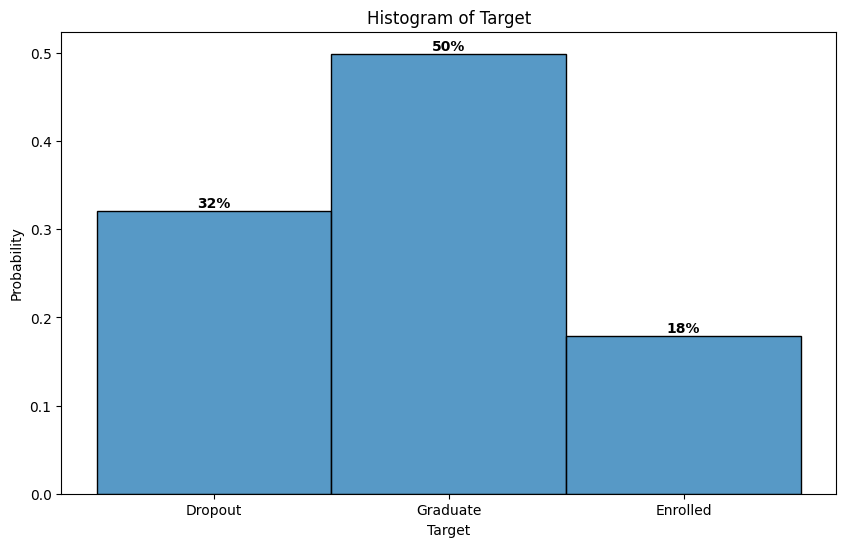

In [ ]:

plt.figure(figsize=(10, 6))

# Create the histogram
ax = sns.histplot(x=df_sch_copy['Target'], bins=10, kde=False, stat="probability", palette='husl')

# Add percentage annotations inside each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Probability')
plt.title('Histogram of Target')

plt.show()

# 7. Data Analysis & Results Presentation

*   Summarize findings
*   Use visualizations to effectively communicate the results & Provide actionable insights for the client based on your analysis. - Explain information, problems, and solutions based on the visulations (e.g looking at this graph, *this* has more response, so should implement *this*)

*Example: For the PWP example above, you might use association rule mining or a similar technique to identify frequently co-occurring products*

### 7.1 Pipeline Creation

In [ ]:
# Selecting all the columns we want to include
selected_columns = ['CU 2 (grade)', 'CU 1 (grade)', 'Tuition fees up to date', 'Scholarship holder', 'Dropouts']
selected_df = df_sch_copy[selected_columns].copy()

# Choosing our target and feature columns
targets = selected_df['Dropouts']
features = selected_df.drop('Dropouts', axis=1)

# Identifying which features are numerical or binary categorical variables
numerical_features = ['CU 2 (grade)', 'CU 1 (grade)']
categorical_features = ['Tuition fees up to date', 'Scholarship holder']

# ColumnTransformer specifies what processes apply to specific columns
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), numerical_features), # StandardScaler for numeric columns
    ("cat", OneHotEncoder(),  categorical_features) # OneHotEncoder for categorical columns
])

# Apply pipeline to the selected_df
features_preprocessed = full_pipeline.fit_transform(selected_df)

# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(features_preprocessed, targets, test_size=0.2, random_state=42)

### 7.2 Testing Different Classifiers

In [ ]:
# LR - Logisic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
lr_accuracy = round(metrics.accuracy_score(y_test, y_predict)*100, 6)
report = classification_report(y_test, y_predict)

print(f"Accuracy: {lr_accuracy}")
print("Classification Report:\n", report)

Accuracy: 82.146893
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       569
           1       0.85      0.61      0.71       316

    accuracy                           0.82       885
   macro avg       0.83      0.77      0.79       885
weighted avg       0.82      0.82      0.81       885



In [ ]:
# KNN - K Nearest Neighbour
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
knn_accuracy = round(metrics.accuracy_score(y_test, y_predict)*100, 6)
report = classification_report(y_test, y_predict)

print(f"Accuracy: {knn_accuracy}")
print("Classification Report:\n", report)

Accuracy: 81.920904
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87       569
           1       0.81      0.65      0.72       316

    accuracy                           0.82       885
   macro avg       0.82      0.78      0.79       885
weighted avg       0.82      0.82      0.81       885



In [ ]:
# DTC - Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)
dtc_accuracy = round(metrics.accuracy_score(y_test, y_predict)*100, 6)
report = classification_report(y_test, y_predict)

print(f"Accuracy: {dtc_accuracy}")
print("Classification Report:\n", report)

Accuracy: 76.384181
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       569
           1       0.68      0.63      0.66       316

    accuracy                           0.76       885
   macro avg       0.74      0.73      0.74       885
weighted avg       0.76      0.76      0.76       885



In [ ]:
# GNB - Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predict = gnb.predict(X_test)
gnb_accuracy = round(metrics.accuracy_score(y_test, y_predict)*100, 6)
report = classification_report(y_test, y_predict)

print(f"Accuracy: {gnb_accuracy}")
print("Classification Report:\n", report)

Accuracy: 82.259887
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       569
           1       0.84      0.62      0.71       316

    accuracy                           0.82       885
   macro avg       0.83      0.78      0.79       885
weighted avg       0.83      0.82      0.81       885



In [ ]:
# SVC - Support Vector Classification
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
svm_accuracy = round(metrics.accuracy_score(y_test, y_predict)*100, 6)
report = classification_report(y_test, y_predict)

print(f"Accuracy: {svm_accuracy}")
print("Classification Report:\n", report)

Accuracy: 82.146893
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       569
           1       0.85      0.61      0.71       316

    accuracy                           0.82       885
   macro avg       0.83      0.77      0.79       885
weighted avg       0.82      0.82      0.81       885



#### Producing a report

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Logistic Regression',
              'Decision Tree Classifier','Support Vector Machines'],
    'Score': [knn_accuracy, gnb_accuracy, lr_accuracy,
              dtc_accuracy, svm_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Naive Bayes,82.259887
2,Logistic Regression,82.146893
4,Support Vector Machines,82.146893
0,KNN,81.920904
3,Decision Tree Classifier,76.384181


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Use the best model for predictions
y_predict = gnb.predict(X_test)
svm_accuracy = round(metrics.accuracy_score(y_test, y_predict) * 100, 6)
report = classification_report(y_test, y_predict)

print(f"Accuracy with best hyperparameters: {svm_accuracy}")
print("Classification Report:\n", report)

Accuracy with best hyperparameters: 82.259887
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       569
           1       0.84      0.62      0.71       316

    accuracy                           0.82       885
   macro avg       0.83      0.78      0.79       885
weighted avg       0.83      0.82      0.81       885



### 7.4 Testing model

In [ ]:
# Create a dictionary with feature values for a single student
test_data = {
    'CU 2 (grade)': 5,
    'CU 1 (grade)': 15,
    'Tuition fees up to date': 1,  # 1 for yes, 0 for no
    'Scholarship holder': 0       # 1 for yes, 0 for no
}

# Create a DataFrame from the dictionary
test_df = pd.DataFrame([test_data])

# Apply the same preprocessing pipeline to the test data
test_features_preprocessed = full_pipeline.transform(test_df)

# Make a prediction using the trained GNB model
prediction = gnb.predict(test_features_preprocessed)
prediction_prob = gnb.predict_proba(test_features_preprocessed)
# Display the prediction
print("Prediction for the test data:")
print(prediction[0])
print("Probabilities of that prediction:")
print(prediction_prob)

Prediction for the test data:
0
Probabilities of that prediction:
[[0.76028548 0.23971452]]


In [ ]:
test_data = {
    'CU 2 (grade)': 5,
    'CU 1 (grade)': 15,
    'Tuition fees up to date': 0,  # 1 for yes, 0 for no
    'Scholarship holder': 0       # 1 for yes, 0 for no
}

# Create a DataFrame from the dictionary
test_df = pd.DataFrame([test_data])

# Apply the same preprocessing pipeline to the test data
test_features_preprocessed = full_pipeline.transform(test_df)

# Make a prediction using the trained GNB model
prediction = gnb.predict(test_features_preprocessed)
prediction_prob = gnb.predict_proba(test_features_preprocessed)
# Display the prediction
print("Prediction for the test data:")
print(prediction[0])
print("Probabilities of that prediction:")
print(prediction_prob)

Prediction for the test data:
1
Probabilities of that prediction:
[[5.51869321e-17 1.00000000e+00]]
